In [288]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


(320, 400, 4)

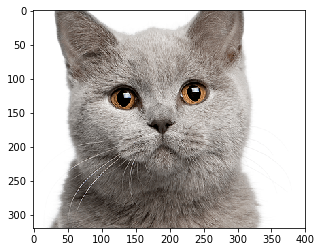

In [289]:
cat = misc.imread('cat.png')
plt.imshow(cat)
cat.shape

In [290]:
# Sequencia de layers do Keras, com o comando model.add adiciona um novo layer
model = Sequential()

# Adiciona um Layer de Convolução, com filtro de tamanho 3x3
model.add(Convolution2D(3,(3,3),input_shape=cat.shape))


Comandos básicos para iniciar um Modelo com sequencia de layers no Keras. O $Sequential()$ define um modelo, $.add$ adiciona uma nova Layer.

No caso do exemplo abaixo, adiciona um Layer de Convolução com Filtro de tamanho 3X3. Especificando também a dimensionalidade da saida para 3, que é a quantidade de filtros convolucionais utilizados, ou seja, a saida de cada aplicação do filtro. Como não foi especificado, por default a convolução utiliza uma função de ativação linear $a(x) = x$, esse valor pode ser modificado usando o parâmetro 'activation'

---

In [291]:
# Expande a dimensão, colocando +1 dimensão
cat_batch = np.expand_dims(cat,axis=0)

# Executa a a sequencia com a entrada do cat_batch
conv_cat  = model.predict(cat_batch)



A função $model.predict(...)$ gera a saida da Sequencia predefinida anteriormente no modelo. Aparentemente precisa ter uma dimensão a mais no $cat$, por isso usa-se a $np.expand_dims$ e posteriormente a $np.squeeze$ para retornar a dimensão original.

---


In [292]:
# Visualiza a imagem após o processamento das sequencias do modelo. 
# Ou seja, é a saida da imagem após o processamento de filtros convolucionais,
# utilizando como RGB cada saida de filtro convolucional.
def visualize_cat(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat = model.predict(cat_batch)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print(conv_cat.shape)
    plt.imshow(conv_cat)

(318, 398, 3)


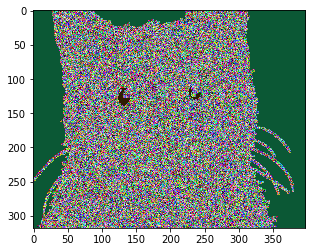

In [293]:
visualize_cat(model, cat)

Resultado da convolução com filtro 3x3 e função de ativação linear. 

---

In [294]:
# Sequencia 2
model = Sequential()
model.add(Convolution2D(3, (10,10) ,input_shape=cat.shape))

Na sequencia 2, a única diferença é o tamanho do filtro da convolução, que agora está utilizando uma janela de 10x10.

---

(311, 391, 3)


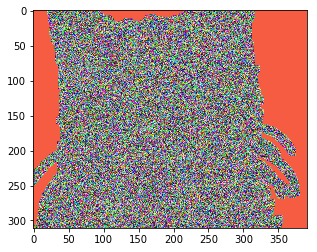

In [295]:
visualize_cat(model, cat)

Resultado da convolução com filtro 10x10 e com ativação linear. É visível a diferença com a modificação de 3x3 para 10x10, deixando os traços mais "grossos". Outro ponto importante a ser comentando, é o shape de saida dessa sequencia, que é menor que o da sequencia anteriror. Isso dar-se pelo tamanho do filtro 10x10 com o tamanho da imagem original, gerando o efeito de redução da saido. Tem uma equção pra calcular isso, só não lembro agora. rs

---

In [296]:
# Visualiza a imagem após o processamento das sequencias do modelo. 
# Ou seja, é a saida da imagem após o processamento de filtros convolucionais,
# A saida usa uma convolução com dimensao 1, ou seja, apenas um filtro convolucional
def imprime_gatinho_fofo(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)
    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print(conv_cat2.shape)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])
    print(conv_cat2.shape)
    plt.imshow(conv_cat2)

(318, 398, 1)
(318, 398)


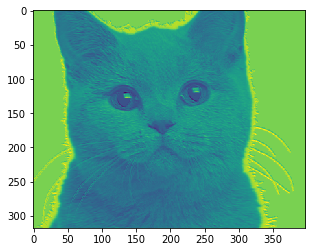

In [297]:
# Sequencia 3
model = Sequential()
model.add(Convolution2D(1,(3,3),input_shape=cat.shape))

imprime_gatinho_fofo(model, cat)    

No caso do exemplo acima, adiciona um Layer de Convolução com Filtro de tamanho 3x3. Especificando também a dimensionalidade da saida para 1, que é a quantidade de filtros convolucionais utilizados. Exibindo o gatinho no final

(306, 386, 1)
(306, 386)


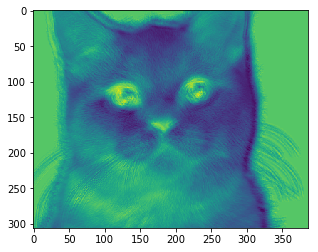

In [298]:
# Sequencia 4
model = Sequential()
model.add(Convolution2D(1, (15, 15),input_shape=cat.shape))

imprime_gatinho_fofo(model, cat)

No caso do exemplo acima, adiciona um Layer de Convolução com Filtro de tamanho 15x15. Especificando também a dimensionalidade da saida para 1, que é a quantidade de filtros convolucionais utilizados. É possivel observar, que diferente da sequencia 3 em que usou um fintro com kernel menor, essa imagem aparce mais "borrada" e com o sshape menor do que anteriormente.

---

(318, 398, 1)
(318, 398)


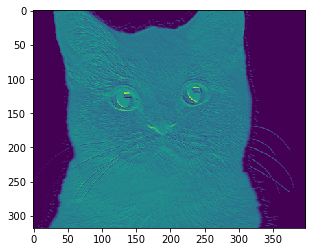

In [311]:
# Sequencia 5
model = Sequential()
model.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model.add(Activation('relu'))

imprime_gatinho_fofo(model, cat)

A diferença da senquencia 5 para as atenriores, é que utiliza uma camada de "RELU" após a convolução. Saida de um filtro 3x3 de convolução com 'relu'

(318, 398, 3)


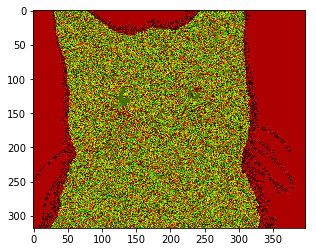

In [312]:
# Sequencia 6
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))

visualize_cat(model, cat)


Nesse exemplo, ainda utiliza uma cama de 'relu' ao final da convolução. Mas, aqui utiliza a saida de 3 filtros combinados de convolução (exibição da imagem como RGB) com kernel 3x3

(63, 79, 1)
(63, 79)


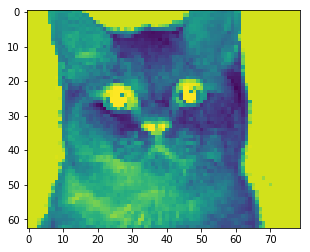

In [313]:
# Sequencia 7
model = Sequential()
model.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(5,5)))
imprime_gatinho_fofo(model, cat)


O que temos de novo é a camada de Poolling ($MaxPooling2D$) com valor máximo e kernel 5x5.  Devido ao tamanho do kernel do $MaxPooling2D$, a imagem reduziu 5x de tamanho, de 318 -> 63 e 398 -> 79. Mas ainda mantem as características do gatinho fofo. 

(63, 79, 3)


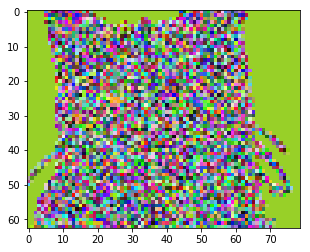

In [15]:
# Sequencia 8
model = Sequential()
model.add(Convolution2D(3,(3,3),input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(5,5)))
visualize_cat(model, cat)

Representação de 3 dimensões de filtros convolucionais como imagem RGB e com o $MaxPooling2D$.

---

(63, 79, 1)
(63, 79)


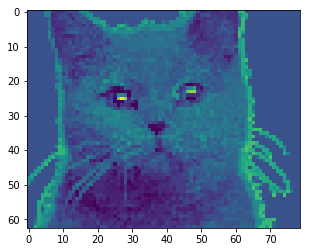

In [315]:
# Sequencia 9
model = Sequential()
model.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

imprime_gatinho_fofo(model, cat)


Combinação das 3 camadas, *Convolução com filtro 3x3* + *RELU* + *MaxPooling 5x5* com apenas uma dimensão na saida.

(63, 79, 3)


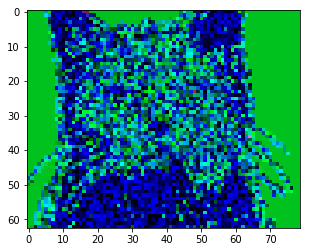

In [17]:
# Modelo 10

model = Sequential()
model.add(Convolution2D(3,(3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_cat(model, cat)

Combinação das 3 camadas, *Convolução com filtro 3x3* + *RELU* + *MaxPooling 5x5* com 3 dimensões na saida

---

(34, 43, 1)
(34, 43)


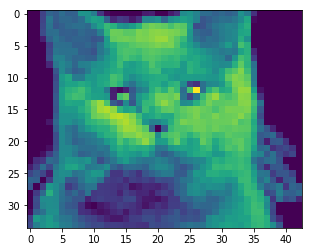

In [320]:
# Sequencia 11
model = Sequential()

model.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

imprime_gatinho_fofo(model, cat)

Aqui o bixo tá pegando. Já temos uma combinação de 6 camadas, reduzindo ao final uma imagem de 34x43 devido as duas de MaxPooling.  Na ordem temos:

* Convolução 3x3 de filtro e 1 dimensão na saida
* Ativação 'Relu'
* MaxPooling com tamanho 3x3
* Convolução 3x3 de fitro e 1 dimensão na saida
* MaxPooling com tamanho 3x3


(52, 65, 1)
(52, 65)


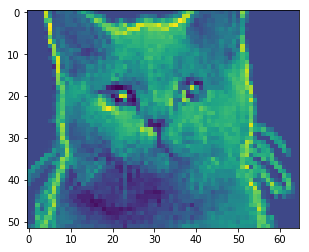

In [321]:
# Sequencia 12
model = Sequential()
model.add(Convolution2D(3, (3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1, (3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

imprime_gatinho_fofo(model, cat)

Semelhante a sequencia 11, embora nesse exemplo tenha variado mais as dimensões das camadas de convolução e MaxPooling.

---

(52, 65, 3)


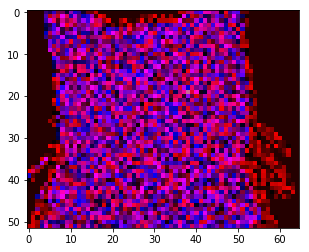

In [20]:
#Sequencia 13
model = Sequential()

model.add(Convolution2D(3,(3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(3,(3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

visualize_cat(model, cat)

Semelhante a sequencia 11, embora nesse exemplo tenha variado mais as dimensões das camadas de convolução e MaxPooling.